# 什么是相关系数
相关性在统计中用来度量变量之间的关系，相关系数在-1到1之间：相关系数越接近-1或1，变量之间的相关关系越强；相关系数越接近0，变量之间的相关关系越弱。

每种相关检验都是用于检验已下假设：

原假设H0 ：变量1和变量2不相关

备选假设H1 ：变量1和变量2相关

p-值＜α，则可以得出变量之间具有显著的相关性。显著性水平α可以取不同的值，多数领域取0.05。这里，我们给α取值0.05。

## 三种不同类型的相关关系：

负相关：一个变量增大，另一个变量减小

不相关：两个变量之间没有相关关系

正相关：一个变量增大，另一个变量也增大

# 三种类型的相关性检验

皮尔森相关系数（Pearson）、皮尔斯曼秩相关系数（Spearman）和肯德尔秩相关系数（Kendall’s Tau-b）都是常见的相关检验。其中，大家最熟悉的应该是皮尔森相关系数了，可能会习惯性地使用。不过请别忘记了，每种相关系数都有特定的假设前提，满足了这些假设前提再进行相应的相关检验，才能更好地反映其相关关系。

## 1. 皮尔森相关系数

皮尔斯相关系数是一种参数方法。满足以下前提假设的皮尔森检验才是有效的。如果任何一个前提假设没有满足，就要用另外两种系数方法了。皮尔森相关系数的假定包括：

所有变量都是连续型变量

观察值匹配：数据在变量之间需要匹配对应

待检验的样本分布接近满足正态分布

无异常值

两个变量之间是直线关系

## 2. 斯皮尔曼等级相关系数

斯皮尔曼等级相关系数是一种非参数方法，对数据分布没有要求。假定包括：

所有变量都应该是连续型变量，或者可排序的分类变量（例如，变量值有“好”、“一般”、“不好”三种，我们把它们依次定义为3，2，1，即可用等级排列）
变量之间为单向关系

## 3. 肯德尔等级相关系数

肯德尔等级相关系数也是一种非参数方法，对数据分布没有要求。需要满足的假定和斯皮尔曼秩相关系数相同：

所有变量都应该是连续型变量，或者可排序的分类变量

变量之间的关系呈单一方向

## 斯皮尔曼等级系数和肯德尔等级系数看起来很像，那么到底该用哪个呢？

一般来说，对同样的数据进行检验，斯皮尔曼等级系数多数情况下会比肯德尔等级系数大（这可能是斯皮尔曼使用得更普遍的原因，相关性强显得好看，道理大家都懂的）。

不过其实，肯德尔等级系数总体来说是更有优势的：

相关关系更易于解释

是对总体参数的更好的估计

在样本较小时（比如小于12）更为精确

当然，因为斯皮尔曼等级系数是用等级的差值（而非等级本身）计算的，因此对异常值更为敏感的。如果有个别样本的关系较大地偏离总体的相关关系，斯皮尔曼等级相关系数就会低很多，有可能会低于肯德尔系数得出的系数值。所以如果需要对相关关系的异常情况较为敏感的检验，斯皮尔曼等级系数会是一个好选择。

In [12]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/tmp/sb2018-08-01.csv")
df = df.dropna()
df.columns

Index(['股票代码', '首板日期', '最大跌幅', '最大涨幅', '最大跌幅位置', '最大涨幅位置', '次日均涨', '位置',
       '次日开盘', '次日高幅', '次日低幅', '次日涨幅', '次日量比', '次日量比10均', '开盘价', '均价', '首板类型',
       '10日最低价/涨停板', '10日最高价/涨停板'],
      dtype='object')

画图，看看数据是不是满足线性关系和同方差。

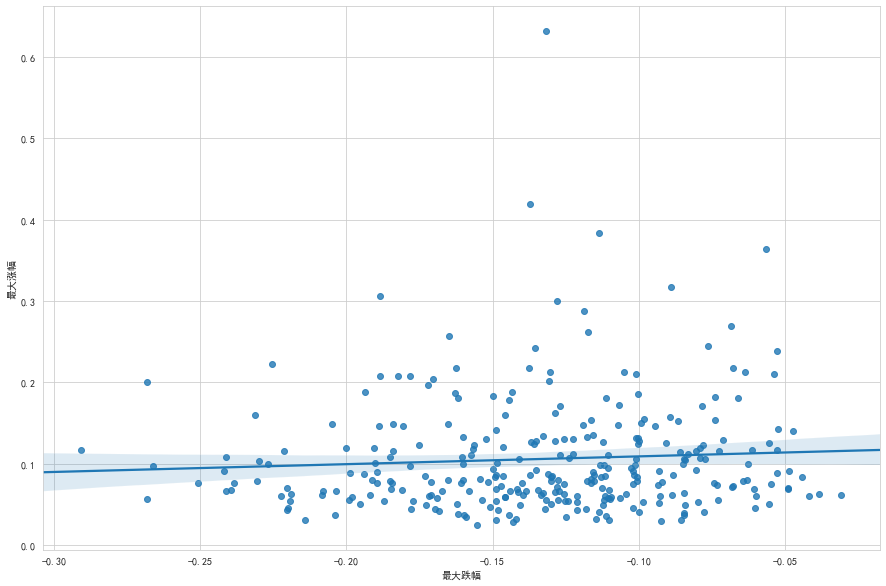

In [20]:
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(15, 10))  # 设置图像大小
sns.set_style("whitegrid",{"font.sans-serif":['simhei', 'Arial']})
sns.regplot(x='最大跌幅', y='最大涨幅', data=df)

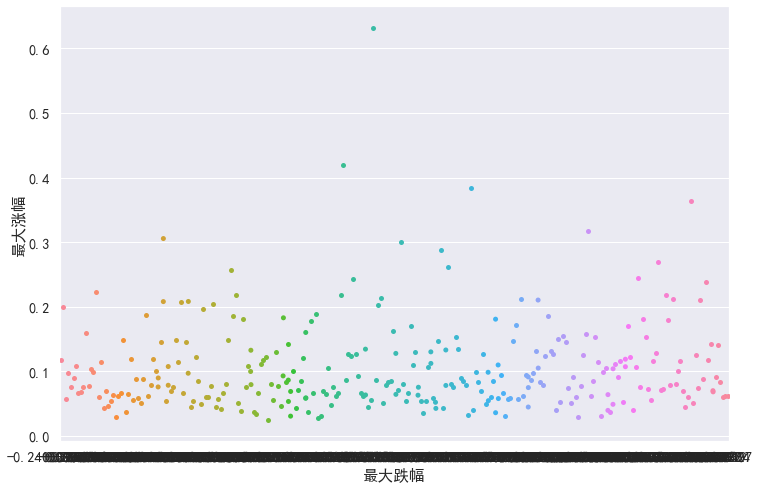

In [29]:
sns.set(style='darkgrid', font='SimHei', rc={'figure.figsize':(12, 8)}, font_scale=1.3)
sns.stripplot(x=df['最大跌幅'], y=df['最大涨幅'], data=df, jitter=True, )

多子图

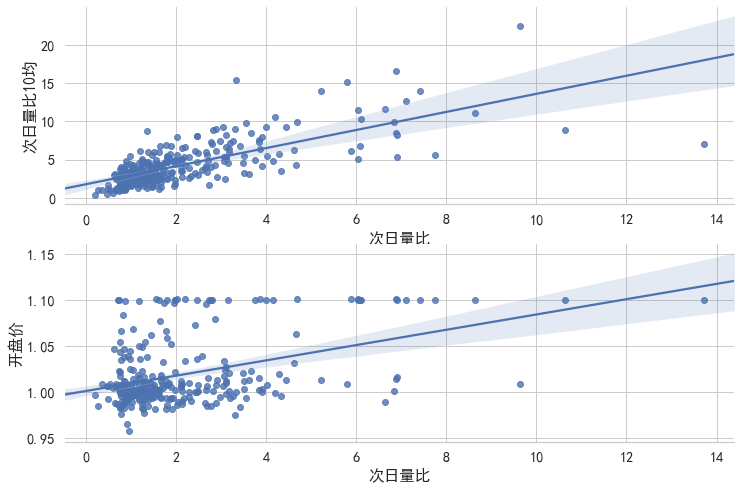

In [31]:
sns.set_style("whitegrid",{"font.sans-serif":['simhei', 'Arial']})
with sns.axes_style("whitegrid"):   #with域中采用whitegrid风格
    plt.subplot(211) # 子图一
    sns.regplot(x='次日量比', y='次日量比10均', data=df)
    sns.despine(left=True)
plt.subplot(212) # 子图二
sns.regplot(x='次日量比', y='开盘价', data=df)
sns.despine(left=True)

Scipy.stats中有多个方法可以用来检验正态分布，比如normaltest() 、shapiro()、kstest(rvs='norm')等，这里我们选用shapiro()

In [5]:
stats.shapiro(df['最大跌幅'])

(0.9828354120254517, 0.0012903159949928522)

In [6]:
stats.shapiro(df['最大涨幅'])

(0.781844973564148, 1.383060847590294e-19)

返回的结果是一个包含统计量w和p-值的元组。可以看到，p-值非常小，接近于0，于是可以拒绝原假设。我们认为不符合正态分布。

# 用Pandas计算相关系数

Pandas中的Series.corr()方法就可以用来计算相关系数，而且三种检验通用，只需在参数method中指定是Pearson（默认）、Spearman或Kendall就可以了。不过返回的只有相关系数，没有p-值。如果需要多组变量两两比较相关关系，DataFrame也有corr()方法，这样返回的是一个表示相关关系的DataFrame，一目了然。

In [7]:
df['最大跌幅'].corr(df['最大涨幅'], method='pearson')

0.06805098212201512

In [8]:
df['最大跌幅'].corr(df['最大涨幅'], method='spearman')

0.0776901792896302

In [9]:
df['最大跌幅'].corr(df['最大涨幅'], method='kendall')

0.05120095364383434

可以看到，三种检验方法都反映了最大跌幅和最大涨幅之间没有强相关关系。
如果还需要知道相关性检验的p-值，Scipy.stats可以帮到大家。

# 用Scipy.stats计算相关系数

不同于Pandas，在Scipy.stats中，三个相关性检验分别需要调用三种不同的方法，分别是pearsonr()、spearmanr()、kendalltau()。

In [10]:
stats.pearsonr(df['最大跌幅'], df['最大涨幅'])

(0.06805098212201516, 0.24313243231682907)

In [11]:
stats.spearmanr(df['最大跌幅'], df['最大涨幅'])

SpearmanrResult(correlation=0.0776901792896302, pvalue=0.18253431427528727)

In [12]:
stats.kendalltau(df['最大跌幅'], df['最大涨幅'])


KendalltauResult(correlation=0.05120095364383434, pvalue=0.18926943183011546)